In [1]:
from sklearn import tree
from sklearn import preprocessing
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
## Import datasetst and encoding target feature

In [56]:
train = pd.read_csv('otto-group-product-classification-challenge/train.csv').drop(columns=['id'])
test = pd.read_csv('otto-group-product-classification-challenge/test.csv')
le = LabelEncoder()
train['target'] = le.fit_transform(train['target'])

train.shape, test.shape

(61878, 94) (144368, 94)


In [ ]:
## Information about features, distribution of values

In [3]:
train.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135,3.842335
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720,2.510794
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000,8.000000


In [4]:
zeros_train = train.apply(lambda s : s.value_counts().get(0,0), axis =1)
print('frequency of zeros in train: {}'.format(zeros_train.sum()/(train.shape[1]*train.shape[0])))

frequency of zeros in train: 0.7853076369217946


array([[<AxesSubplot:title={'center':'feat_1'}>,
        <AxesSubplot:title={'center':'feat_2'}>,
        <AxesSubplot:title={'center':'feat_3'}>,
        <AxesSubplot:title={'center':'feat_4'}>,
        <AxesSubplot:title={'center':'feat_5'}>,
        <AxesSubplot:title={'center':'feat_6'}>,
        <AxesSubplot:title={'center':'feat_7'}>,
        <AxesSubplot:title={'center':'feat_8'}>,
        <AxesSubplot:title={'center':'feat_9'}>,
        <AxesSubplot:title={'center':'feat_10'}>],
       [<AxesSubplot:title={'center':'feat_11'}>,
        <AxesSubplot:title={'center':'feat_12'}>,
        <AxesSubplot:title={'center':'feat_13'}>,
        <AxesSubplot:title={'center':'feat_14'}>,
        <AxesSubplot:title={'center':'feat_15'}>,
        <AxesSubplot:title={'center':'feat_16'}>,
        <AxesSubplot:title={'center':'feat_17'}>,
        <AxesSubplot:title={'center':'feat_18'}>,
        <AxesSubplot:title={'center':'feat_19'}>,
        <AxesSubplot:title={'center':'feat_20'}>],
       

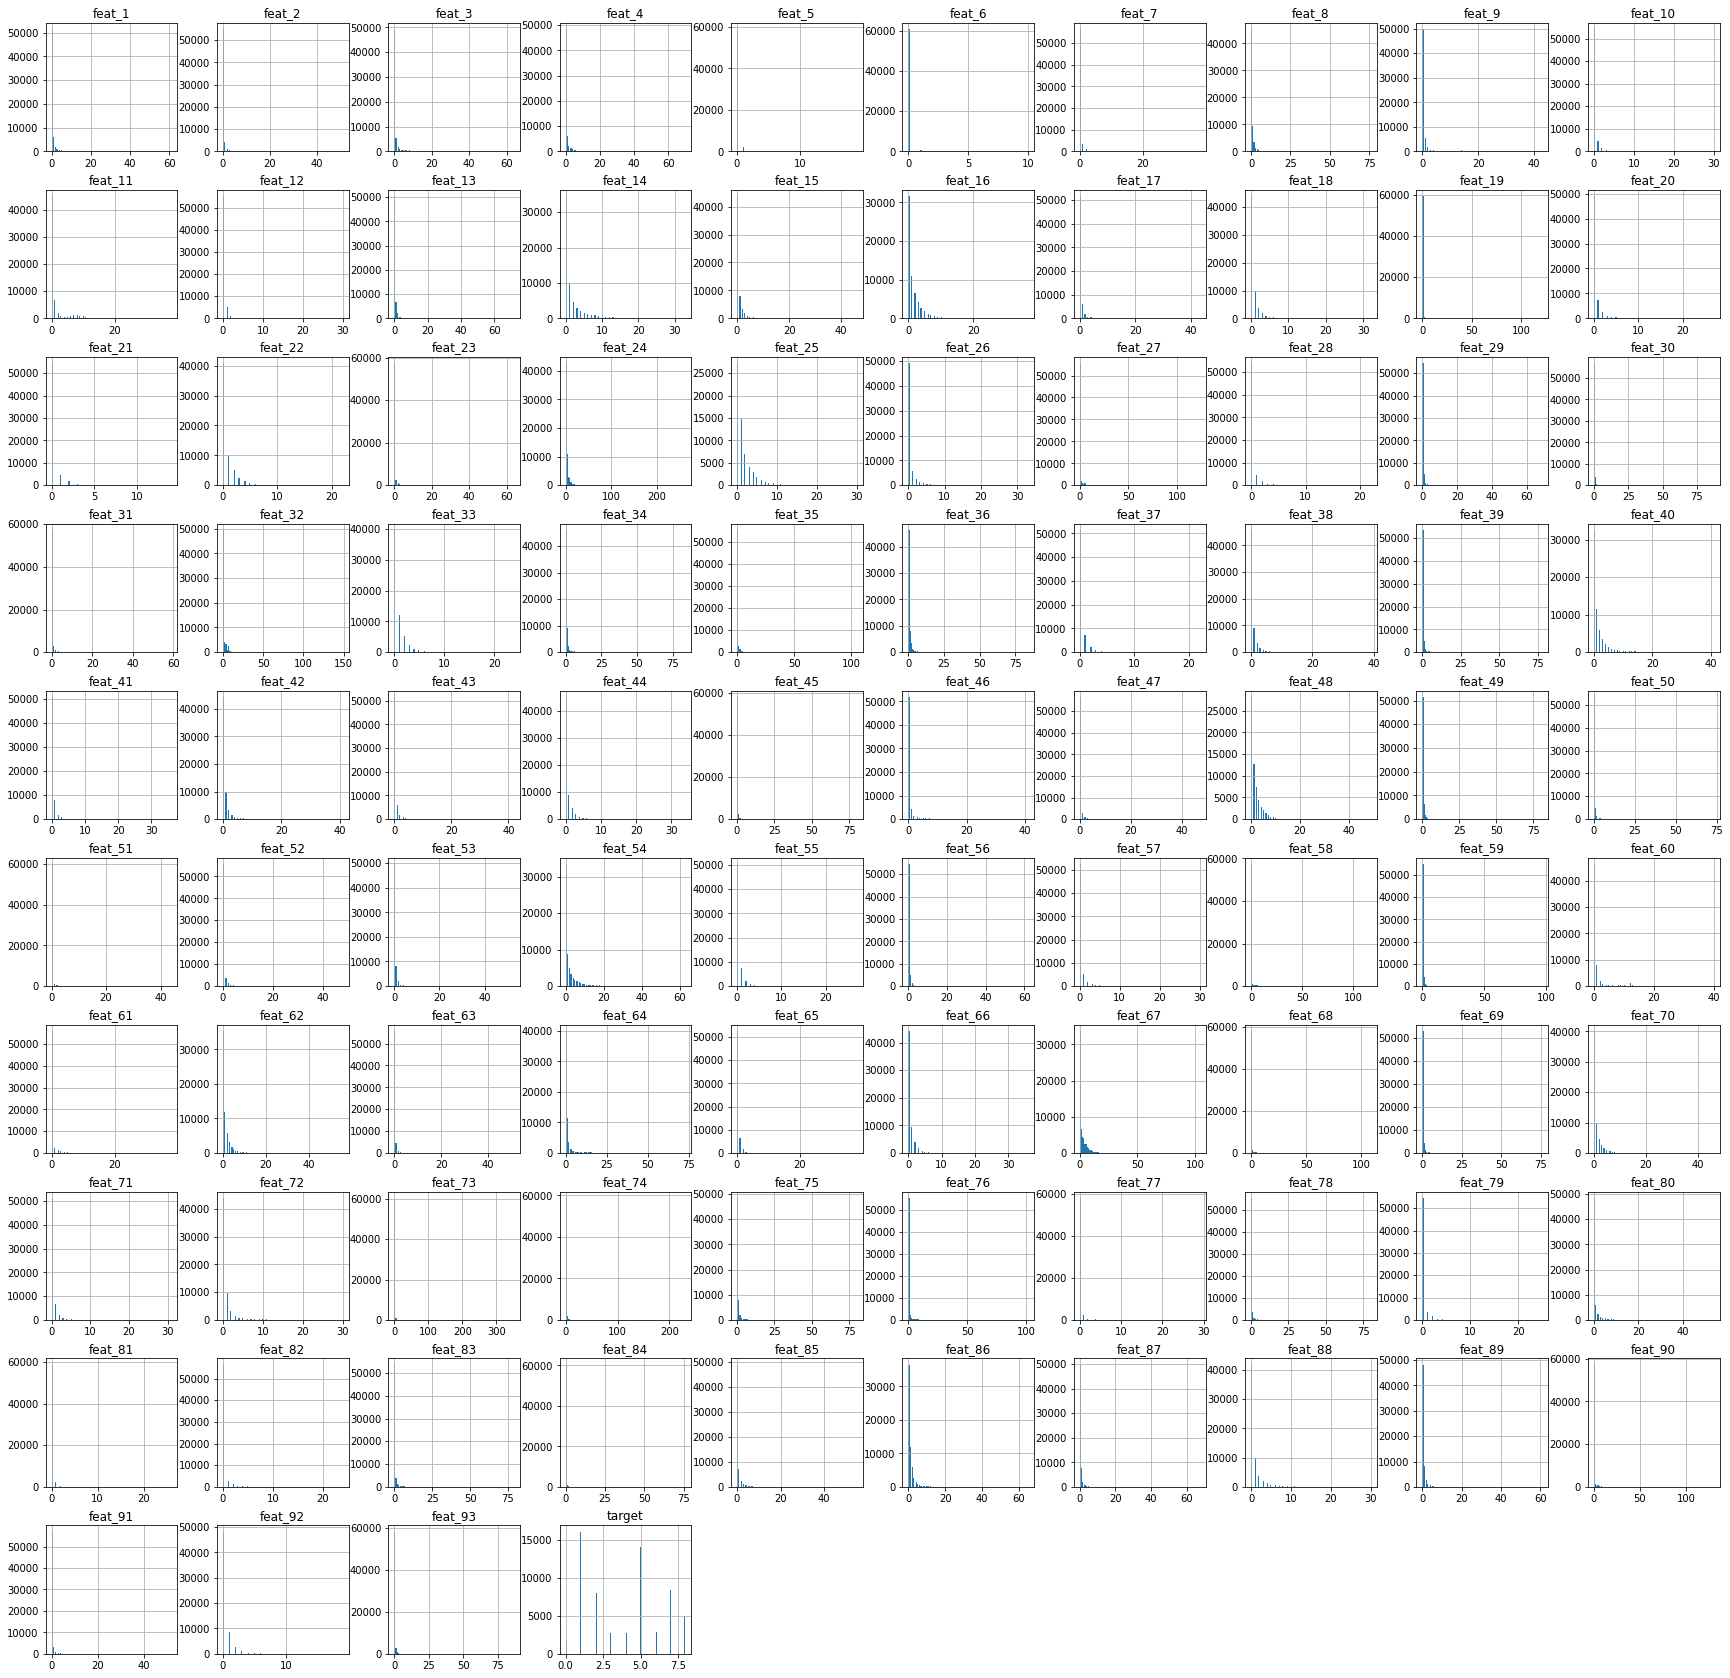

In [8]:
train.hist(bins = 100, figsize=(30,30))
#plt.savefig('./images/train_hists.png', dpi = 300)
#same with test.csv

In [ ]:
## Dividing the dataset into training and test datasets

In [6]:
X_train, X_val, y_train, y_val = \
train_test_split(train[train.columns[:-1]], train[train.columns[-1]], test_size = 0.2, random_state = 23)

In [7]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((49502, 93), (12376, 93), (49502,), (12376,))

In [ ]:
## RandomForestClassifier

In [9]:
clf = RandomForestClassifier(n_estimators = 100)


In [ ]:
## Finding important features and sort them by significance

In [ ]:
###

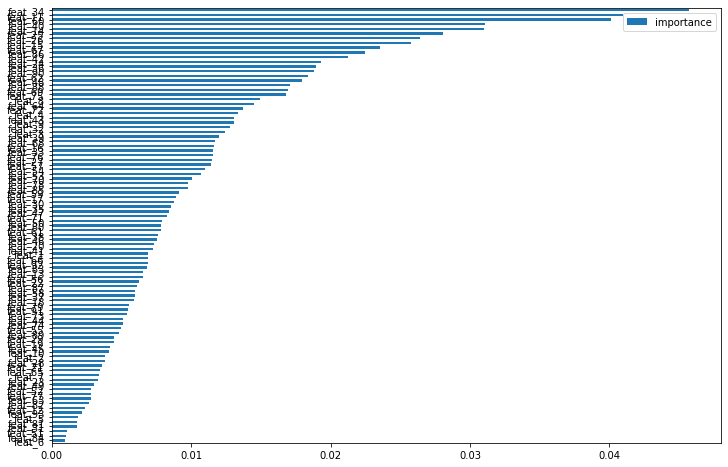

In [12]:
clf.fit(X_train, y_train)
imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

## We select 70 of the most important from 93

important_columns = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance']) \
    .sort_values('importance')[-1:-70:-1].reset_index()['index'].to_list()
important_columns.append('target')

In [312]:
## Select dataset with important features

In [13]:
train_imp_feat = train[important_columns]
train_imp_feat

,feat_34,feat_11,feat_60,feat_40,feat_14,feat_25,feat_26,feat_15,feat_67,feat_86,...,feat_58,feat_37,feat_18,feat_79,feat_91,feat_73,feat_44,feat_74,feat_55,target
0,0,1,11,1,0,1,1,0,7,0,...,0,0,0,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,1,2,0,0,2,0,1,0,0
2,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,2,2,0,5,1,...,0,0,0,1,0,2,2,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,1,0,1,2,0,6,1,0,3,0,...,0,2,2,0,0,1,4,2,3,8
61874,1,0,0,0,2,2,0,0,5,2,...,0,0,0,11,0,0,0,0,0,8
61875,0,0,0,0,1,0,0,0,18,3,...,0,0,1,0,0,0,0,0,0,8
61876,0,0,0,0,0,1,0,0,6,0,...,0,0,0,0,3,0,1,0,0,8


In [ ]:
## create train and test datasets with selected features

In [14]:
X_train_imp, X_val_imp, y_train_imp, y_val_imp = \
train_test_split(train_imp_feat[train_imp_feat.columns[:-1]], train_imp_feat[train_imp_feat.columns[-1]], test_size = 0.2, random_state = 23)

In [15]:
X_train_imp.shape, X_val_imp.shape, y_train_imp.shape, y_val_imp.shape

((49502, 69), (12376, 69), (49502,), (12376,))

In [24]:
params ={'n_estimators': range(80,200,10),
         'max_depth': range(2,15)}

In [29]:
search= GridSearchCV(clf, param_grid= params, n_jobs=-1)

In [30]:
search.fit(X_train_imp,y_train_imp )

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 15),
                         'n_estimators': range(80, 200, 10)})

In [32]:
search.best_params_

{'max_depth': 14, 'n_estimators': 180}

loss with GridSearchCV: 0.7899770513290075


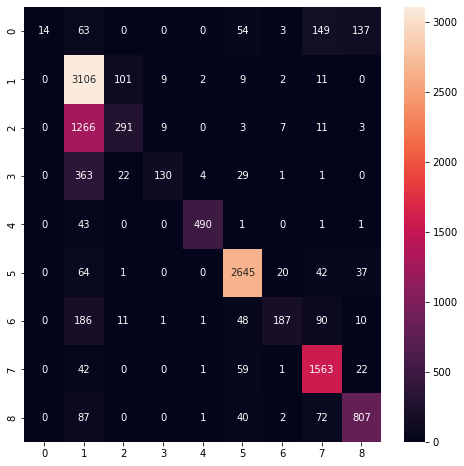

In [33]:
#conf_matrix without GridSearchCV
conf_mat = confusion_matrix(y_val_imp, search.predict(X_val_imp))
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d')
print('loss with GridSearchCV: {0}'.format(log_loss(y_val_imp, search.predict_proba(X_val_imp), eps = 1e-15, normalize=True)))

loss without GridSearchCV: 0.6091635299527669


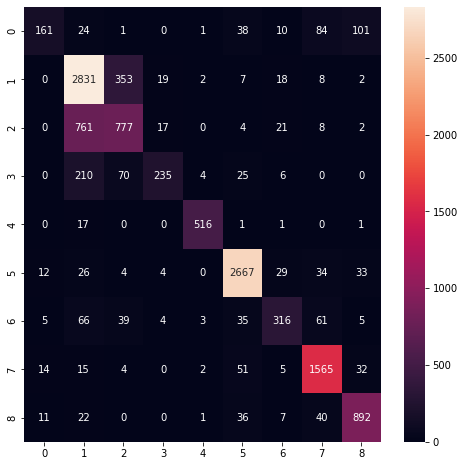

In [17]:
#conf_matrix without GridSearchCV
conf_mat = confusion_matrix(y_val_imp, clf.predict(X_val_imp))
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d')
print('loss without GridSearchCV: {0}'.format(log_loss(y_val_imp, clf.predict_proba(X_val_imp), eps = 1e-15, normalize=True)))

In [34]:
print('loss without calibration: {0}'.format(log_loss(y_val_imp, clf.predict_proba(X_val_imp), eps = 1e-15, normalize=True)))

calibrated_clf = CalibratedClassifierCV(RandomForestClassifier(n_estimators = 180), method='isotonic', cv=5)
calibrated_clf.fit(X_train, y_train)
print('loss with calibration: {0}'.format(log_loss(y_val, calibrated_clf.predict_proba(X_val), eps = 1e-15, normalize=True)))

loss without calibration: 0.6091635299527669
loss with calibration: 0.4904746608313657


<AxesSubplot:>

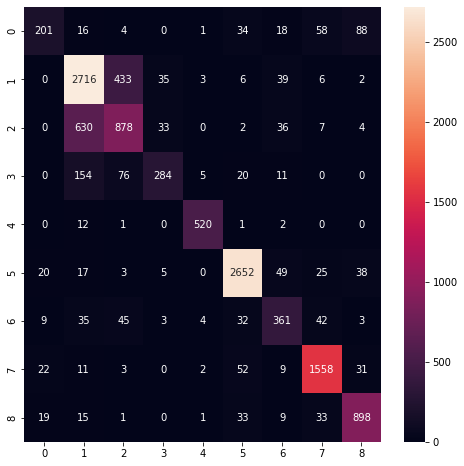

In [35]:
conf_mat = confusion_matrix(y_val, calibrated_clf.predict(X_val))
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d')

In [53]:
pred = calibrated_clf.predict_proba(test.drop(columns=['id']))
pred


array([[2.11710270e-03, 1.32210903e-01, 1.32956498e-01, ...,
        1.19452069e-02, 6.42899623e-04, 4.60215264e-04],
       [3.82481711e-03, 6.14670052e-03, 2.96617103e-03, ...,
        6.15842820e-03, 3.12007465e-01, 2.07231640e-03],
       [4.28704231e-04, 0.00000000e+00, 1.69206417e-04, ...,
        3.54729041e-04, 1.95178211e-03, 2.35342419e-04],
       ...,
       [7.10694297e-04, 3.21265431e-01, 4.92595111e-01, ...,
        8.01399599e-03, 6.99007188e-04, 1.63000513e-03],
       [3.62206022e-04, 5.75141168e-01, 3.34327633e-02, ...,
        1.23113859e-03, 2.88691841e-04, 1.75566438e-04],
       [9.26929597e-04, 4.47305948e-01, 4.61010533e-01, ...,
        1.47318596e-02, 3.65401077e-04, 0.00000000e+00]])

In [54]:
output = pd.DataFrame(pred, columns=["Class_1","Class_2","Class_3","Class_4","Class_5","Class_6","Class_7","Class_8","Class_9"])
output.index.name = "id"
output.index += 1
output

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.002117,0.132211,0.132956,0.716046,0.000017,0.003604,0.011945,0.000643,0.000460
2,0.003825,0.006147,0.002966,0.004483,0.000370,0.661971,0.006158,0.312007,0.002072
3,0.000429,0.000000,0.000169,0.000489,0.000021,0.996350,0.000355,0.001952,0.000235
4,0.001273,0.589448,0.366998,0.014439,0.000093,0.000262,0.001787,0.000819,0.024882
5,0.061614,0.000000,0.000000,0.000409,0.000073,0.005071,0.007732,0.235155,0.689946
...,...,...,...,...,...,...,...,...,...
144364,0.430039,0.037105,0.014473,0.031386,0.000031,0.141123,0.179059,0.005765,0.161020
144365,0.000938,0.317139,0.594727,0.071678,0.000022,0.000460,0.014497,0.000327,0.000212
144366,0.000711,0.321265,0.492595,0.173580,0.000020,0.001486,0.008014,0.000699,0.001630


In [55]:
output.to_csv("./otto_submission.csv")